# Modelado y Simulación de Epidemia V.0.1 

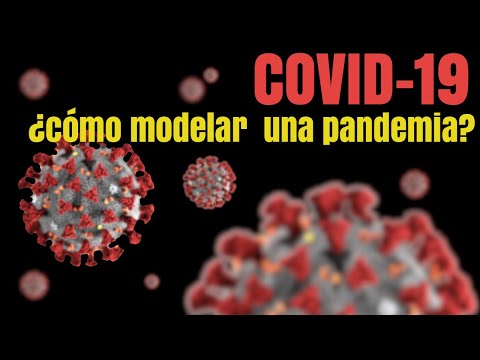

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('mqncEjCoNr0')

Dentro de la epidemiología, uno de los modelos matemáticos determinísticos más usado es el denominado modelo SIR (Susceptible-Infectious-Recovered). El modelo, que tiene su origen en el trabajo de Kermack y McKendrick (1972)1
, permite caracterizar la evolución de una epidemia que se propaga mediante contagio entre los individuos de una población de tamaño N que permanece constante. En cada momento del tiempo t los individuos pueden encontrarse en tres posibles estados o compartimentos,

* Susceptibles $S(t)$: individuos sanos que pueden ser contagiados por los infectados.
* Infectados $I(t)$: individuos portadores de la enfermedad.
* Recuperados $R(t)$: individuos que se han recuperado de la enfermedad2

El modelo cuenta con dos parámetros, que son los siguientes:
* Tasa de infección o tasa de transmisión de la enfermedad $\beta$ : nos indica el número de
contactos suficientes para la transmisión de una persona por unidad de tiempo. Es decir, el
parámetro $\beta$ es el producto del número de contactos medios por individuo y unidad de tiempo y
la probabilidad de contagio en un solo contacto entre un individuo infectado y un individuo
susceptible. En consecuencia $\beta \frac{I(t)}{N}$ nos indica el número medio de contactos infectados por
unidad de tiempo de un individuo susceptible, mientras que $\beta \frac{S(t)I(t)}{N}$ es el número de casos
nuevos por unidad de tiempo.

* Tasa de recuperación $\gamma$ : nos indica la tasa por unidad de tiempo a la cual los individuos
infectados se recuperan. Es decir, es la ratio entre el número de recuperados y el número de
infectados por unidad de tiempo El periodo medio de latencia se calcula como la inversa de la
tasa de recuperación, $L = \frac{1}{\gamma}$

Es importante resaltar, de nuevo, que el valor de la tasa de infección o transmisión está relacionado,
por un lado, con el número de contactos por unidad de tiempo y, por otro lado, con la probabilidad de
contagio. Si bien es cierto que una parte importante de la tasa de infección depende de si la enfermedad
es más o menos contagiosa, las medidas de prevención como el confinamiento, el distanciamiento y la
adopción de medidas de higiene y protección por parte de la población, tienden a reducir el valor de la
misma


El esquema correspondiente a este modelo matemático es el siguiente:
<img src="epidemia.png" />

La dinámica del modelo está representada por el siguiente sistema de ecuaciones diferenciales que
describen la variación en el tiempo de cada uno de los tres estados posibles,

$\frac{dS}{dt}= -\beta S \frac{I}{N}$

$\frac{dI}{dt}= \beta S \frac{I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Partiendo de un número inicial dado de individuos infectados ($I_0$ ), las condiciones iniciales del modelo
son las siguientes: $S_{(t=0)}=S_0=N-I_0$, $I_{(t=0)}=I_0$, $R_{t=0}=0$. Lógicamente recordar que $N = S + I +R$

Un parámetro de gran interés en epidemiologia es la denominada tasa básica de reproducción $R_0$ ,
utilizada para describir la intensidad de una enfermedad infecciosa. De forma específica, la tasa
reproductiva básica nos indica el número de nuevos infectados, en promedio, por un solo infectado a lo
largo del periodo de duración de la enfermedad infecciosa. La tasa de reproducción básica se calcula
de la siguiente manera: $R_0= \frac{\beta}{\gamma}$

La tasa reproductiva básica nos da indicios de si la enfermedad se va a propagar o no, y de la velocidad
con que una enfermedad puede propagarse en una población de individuos determinada. Cuando $R_0 >
1$ la enfermedad puede llegar a propagarse ampliamente entre la población. Sin embargo, si $R_0 < 1$ la
enfermedad desaparece tras un cierto periodo de tiempo.
Este sencillo modelo, que permite una gran casuística mediante diversidad de variantes del modelo
básico, presenta al menos dos utilidades para el caso que nos concierne. En primer lugar, permite
simular la evolución de una determinada enfermedad infecciosa y comparar distintas situaciones o
escenarios, añadiendo al modelo valores para los siguientes parámetros: tasa de infección $\beta$, tasa de
recuperación $\gamma$, tamaño de la población $N$ y número de infectados inicialmente $I_0$. En segundo
lugar, es posible ajustar el modelo SIR a datos reales procedentes de un determinado país o región, lo
que permite obtener estimaciones sobre la tasa de infección, la tasa de recuperación y, en consecuencia, sobre la tasa reproductiva básica. De este modo se obtiene información valiosa de cómo está evolucionando la enfermedad.

# APLICACIÓN AL CASO DEL COVID-19 EN BOLIVIA

In [2]:
import pandas
import numpy
from numerico import *
import matplotlib.pyplot as pl

In [3]:
data = pandas.read_csv("COVID_BOLIVIA.csv")

In [4]:
data

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
0,1/22/2020,Bolivia,BO,NaN,Bolivia,0,11350000,0,0,-50,0
1,1/23/2020,Bolivia,BO,NaN,Bolivia,0,11350000,0,0,-49,0
2,1/24/2020,Bolivia,BO,NaN,Bolivia,0,11350000,0,0,-48,0
3,1/25/2020,Bolivia,BO,NaN,Bolivia,0,11350000,0,0,-47,0
4,1/26/2020,Bolivia,BO,NaN,Bolivia,0,11350000,0,0,-46,0
...,...,...,...,...,...,...,...,...,...,...,...
123,5/24/2020,Bolivia,BO,NaN,Bolivia,5915,11344085,609,240,74,5915
124,5/25/2020,Bolivia,BO,NaN,Bolivia,6263,11343737,629,250,75,6263
125,5/26/2020,Bolivia,BO,NaN,Bolivia,6660,11343340,647,261,76,6660
126,5/27/2020,Bolivia,BO,NaN,Bolivia,7136,11342864,677,274,77,7136


In [5]:
data.describe()

,province,confirmed,suspected,cured,dead,Days,net_confirmed
count,0.0,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000
mean,NaN,915.109375,1.134908e+07,91.789062,40.640625,14.453125,915.109375
std,NaN,1716.120846,1.716121e+03,179.940351,69.497038,37.172689,1716.120846
min,NaN,0.000000,1.134223e+07,0.000000,0.000000,-50.000000,0.000000
25%,NaN,0.000000,1.134911e+07,0.000000,0.000000,-17.250000,0.000000
50%,NaN,37.500000,1.134996e+07,0.000000,0.000000,14.500000,37.500000
75%,NaN,887.000000,1.135000e+07,76.500000,47.000000,46.250000,887.000000
max,NaN,7768.000000,1.135000e+07,689.000000,280.000000,78.000000,7768.000000


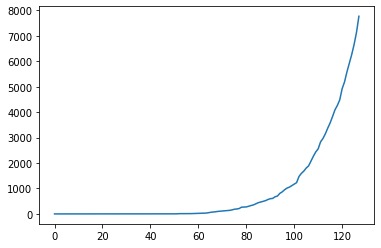

In [5]:

confirmados = data["confirmed"]
pl.plot(range(confirmados.count()), confirmados)
pl.show()

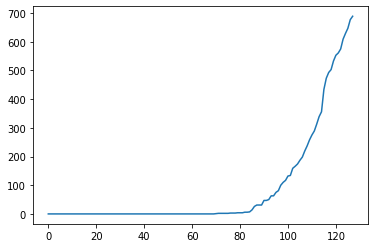

In [6]:
recuperados = data["cured"]
pl.plot(range(recuperados.count()), recuperados)
pl.show()

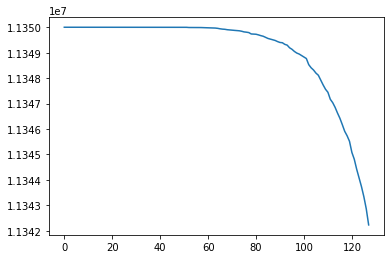

In [7]:
suceptibles = data["suspected"]
pl.plot(range(suceptibles.count()), suceptibles)
pl.show()

In [8]:
type(data["date"])

pandas.core.series.Series

In [9]:
data["date"]

0      1/22/2020
1      1/23/2020
2      1/24/2020
3      1/25/2020
4      1/26/2020
         ...    
123    5/24/2020
124    5/25/2020
125    5/26/2020
126    5/27/2020
127    5/28/2020
Name: date, Length: 128, dtype: object

## Iniciamos resolviendo el modelo SIR

Para nuestra prueba, las condiciones iniciales: $I_{(t=0)}= 3$, $S_{(t=0)}=N-I$, $R_{(t=0)}=0$. Los parámetros $\beta = 0.2$, $\gamma = \frac{1}{7}$

In [10]:
def epidemia(t, ci, beta, gamma, N):
    pass
    dsdt = -beta * ci[0] * (ci[1]/N) 
    didt = beta * ci[0] * (ci[1]/N) - gamma * ci[1]
    drdt = gamma * ci[1]
    return numpy.array([dsdt, didt, drdt])

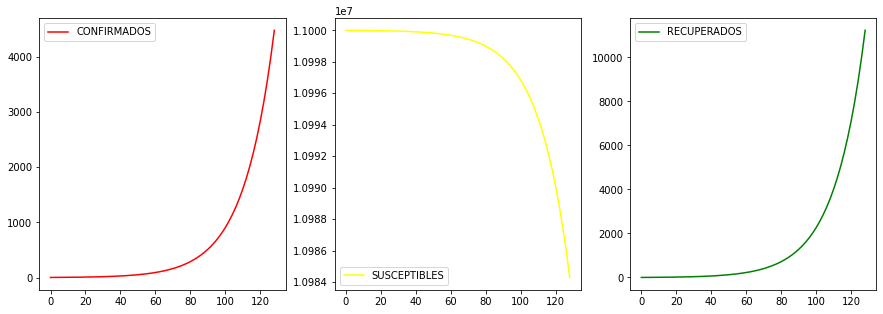

In [12]:
# LA PRUEBA
N = 11e6
gamma = 1/7
beta = 0.2

I = 3
R = 0
S = N - I
ci = numpy.array([S, I, R])

tf = 129
#SOLUCION CON RK4

solucion, tiempos = Rk4(0, tf, ci, 1, epidemia, beta, gamma, N)

fig = pl.figure(figsize=(15,5))
fig.tight_layout()
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.plot(tiempos, solucion[:, 1], label="CONFIRMADOS",color = "red")
ax2.plot(tiempos, solucion[:, 0], label="SUSCEPTIBLES", color = "yellow")
ax3.plot(tiempos, solucion[:, 2], label="RECUPERADOS", color = "green")
ax1.legend()
ax2.legend()
ax3.legend()

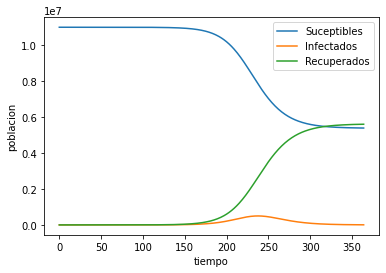

In [14]:
#ENCONTRAR BETA Y GAMMA:
"""N = 25000
N = 11000000"""
N = 11e6
gamma = 1/7
beta = 0.2

I = 3
R = 0
S = N - I
ci = numpy.array([S, I, R])

tf = 365
#SOLUCION CON RK4
solucion, tiempos = Rk4(0, tf, ci, 1, epidemia, beta, gamma, N)

pl.plot(tiempos, solucion[:, 0], label="Suceptibles")
pl.plot(tiempos, solucion[:, 1], label="Infectados")
pl.plot(tiempos, solucion[:, 2], label="Recuperados")
pl.legend()
pl.xlabel("tiempo")
pl.ylabel("poblacion")
pl.show()

# <font color="red">Ejercicio: Puedes establecer los parametros $\beta$ y $ghamma$ para ajustar a los datos de la evolución del corona virus en  Bolivia 2020? Puedes confiar en el modelo SIR para esta gestión? Experimenta con el modelo SEIR e indaga los resultados. Existe otros modelos mas adecuados? donde esta la dificultad?</font>


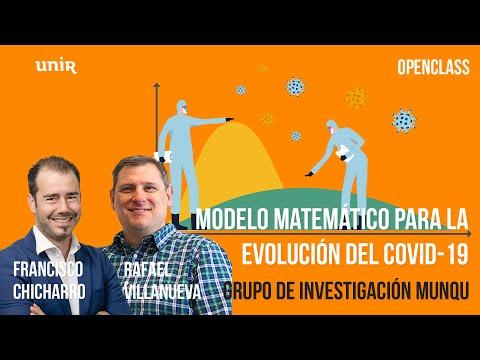

In [13]:
YouTubeVideo('q7NU5BZ6qOY')

## DATOS REALES DE COVID EN BOLIVIA

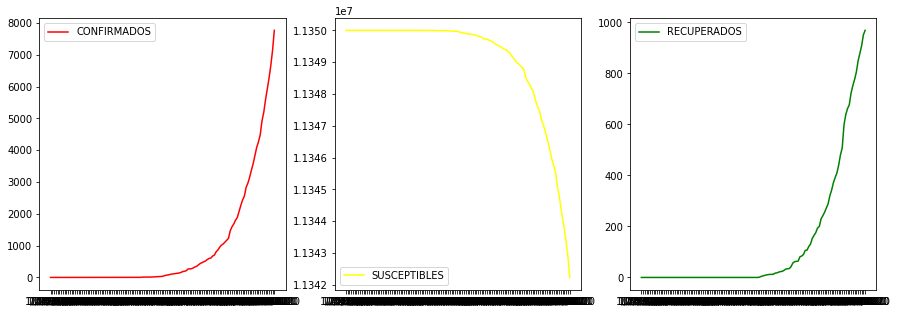

In [17]:
fig = pl.figure(figsize=(15,5))
fig.tight_layout()
ax1=fig.add_subplot(1,3,1)#data["date"], data["confirmed"], label="CONFIRMADOS"
ax2=fig.add_subplot(1,3,2)#data["date"], data["suspected"], label="suceptibles"
ax3=fig.add_subplot(1,3,3)#data["date"], data["cured"] + data["dead"], label="Recuperados"
ax1.plot(data["date"], data["confirmed"], label="CONFIRMADOS",color = "red")
ax2.plot(data["date"], data["suspected"], label="SUSCEPTIBLES", color = "yellow")
ax3.plot(data["date"], data["cured"] + data["dead"], label="RECUPERADOS", color = "green")
ax1.legend()
ax2.legend()
ax3.legend()

## Gráficas con Ajuste de Parámetros:

### 1 : Ajustando a la Gráfica de Recuperados

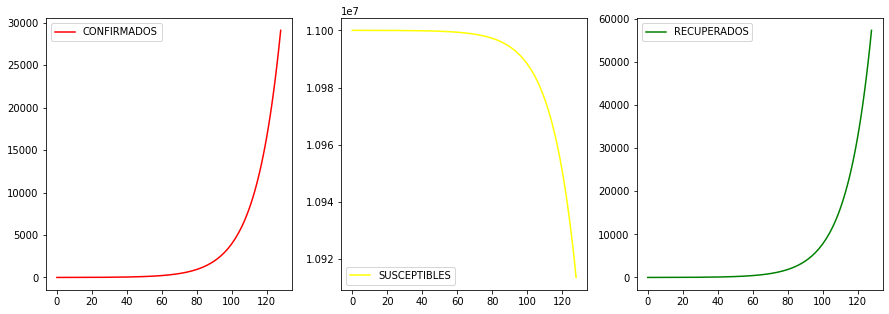

In [162]:
# PARAMETROS
N = 11e6
gamma = 0.178
beta = 0.21

I = 3
R = 0
S = N - I
ci = numpy.array([S, I, R])

tf = 129

# SOLUCION CON RK4
solucion, tiempos = Rk4(0, tf, ci, 1, epidemia, beta, gamma, N)

# GRAFICACION
fig = pl.figure(figsize=(15,5))
fig.tight_layout()
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.plot(tiempos, solucion[:, 1], label="CONFIRMADOS",color = "red")
ax2.plot(tiempos, solucion[:, 0], label="SUSCEPTIBLES", color = "yellow")
ax3.plot(tiempos, solucion[:, 2], label="RECUPERADOS", color = "green")
ax1.legend()
ax2.legend()
ax3.legend()

###  INTERPRETACIÓN:
    Con:
       -gamma = 0.178
       -beta = 0.21
    se ajusta la gráfica de RECUPERADOS, sin embargo los otros dos grupos varían respecto a las gráficas obtenidas con los datos reales.

###  2 : Ajustando a la Gráfica de Confirmados

In [ ]:
# PARAMETROS
N = 11e6
gamma = 0.15
beta = 0.212

I = 3
R = 0
S = N - I
ci = numpy.array([S, I, R])

tf = 129

# SOLUCION CON RK4
solucion, tiempos = Rk4(0, tf, ci, 1, epidemia, beta, gamma, N)

# GRAFICACION
fig = pl.figure(figsize=(15,5))
fig.tight_layout()
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.plot(tiempos, solucion[:, 1], label="CONFIRMADOS",color = "red")
ax2.plot(tiempos, solucion[:, 0], label="SUSCEPTIBLES", color = "yellow")
ax3.plot(tiempos, solucion[:, 2], label="RECUPERADOS", color = "green")
ax1.legend()
ax2.legend()

###  INTERPRETACIÓN:
    Con:
       -gamma = 0.15
       -beta = 0.212
    se ajusta la gráfica de CONFIRMADOS, sin embargo los otros dos grupos varían respecto a las gráficas obtenidas con los datos reales.

###  CONCLUSIÓN:
    Se puede llegar a una aproximación de los datos reales con el modelo SIR, pero no con exactitud.

# Modelo SEIR

In [18]:
#Implementación
def SEIR(t, ci, beta, sigma, gamma, N):
    dsdt = -beta * ci[0] * (ci[1]/N) 
    dedt = beta * ci[0] * ci[1] / N - sigma * ci[3]
    didt = sigma * ci[3] - gamma * ci[1]
    drdt = gamma * ci[1]
    return numpy.array([dsdt, didt, drdt, dedt])


In [26]:
#PRUEBA
#SOLUCION MODELO SEIR
N = 11e6
gamma = 1/5
beta = 1
sigma = 1/7
I = 3
E = 1
R = 0
S = N - I - E
ci = numpy.array([S, I, R, E])

tf = 365
#SOLUCION CON RK4
solucion, tiempos = Rk4(0, tf, ci, 1, SEIR, beta, sigma, gamma, N)


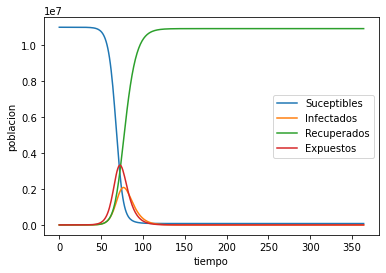

In [27]:
#GRAFICACION
pl.plot(tiempos, solucion[:, 0], label="Suceptibles")
pl.plot(tiempos, solucion[:, 1], label="Infectados")
pl.plot(tiempos, solucion[:, 2], label="Recuperados")
pl.plot(tiempos, solucion[:, 3], label="Expuestos")
pl.legend()
pl.xlabel("tiempo")
pl.ylabel("poblacion")
pl.show()

In [ ]:
#PRUEBA ULTIMA
#SOLUCION MODELO SEIR
N = 11e6
gamma = 1/6
beta = 2
sigma = 1/8
I = 3
E = 1
R = 0
S = N - I - E
ci = numpy.array([S, I, R, E])

tf = 365
#SOLUCION CON RK4
solucion, tiempos = Rk4(0, tf, ci, 1, SEIR, beta, sigma, gamma, N)

In [ ]:
#GRAFICACION
pl.plot(tiempos, solucion[:, 0], label="Suceptibles")
pl.plot(tiempos, solucion[:, 1], label="Infectados")
pl.plot(tiempos, solucion[:, 2], label="Recuperados")
pl.plot(tiempos, solucion[:, 3], label="Expuestos")
pl.legend()
pl.xlabel("tiempo")
pl.ylabel("poblacion")
pl.show()

###  CONCLUSIÓN:
    Con el modelo SEIR se obtiene más información, contemplando a la población de Expuestos. De igual manera se puede ver que sigue la misma tendencia que el modelo SIR. 
    En la base de datos con la que trabajamos no se cuenta con la población de Expuestos, por lo tanto no se puede ajustar el modelo a la realidad. :(

# ANALISIS DE MODELOS:
    Un modelo es una abstracción simplificada de la realidad, tomando en cuenta los elementos más relevantes para poder describir la realidad y utilizarlo para cumplir un objetivo determinado. Para poder predecir la evolución de la epidemia ventajas y desventajas, por lo que es importante poder elegir un modelo que se ajuste a la realidad adecuadamente, tomando los factores que afectan el curso de la pandemia. Dos de los modelos más conocidos para predecir epidemias que son los más usados para predecir el COVID, son el modelo SIR y SEIR. Ambos tienen sus falencias y sus beneficios. A grandes rasgos, ambos pueden predecir con cierto grado de precisión la evolución del COVID, sin embargo, ninguno de ellos toma en cuenta todos los factores que podrían influir. El modelo SIR y SEIR son ambos modelos relativamente simples. Ambos toman en cuenta a tres grupos: los Suceptibles, Infectados y Recuperados. Ambos con cerrados, lo cual significa que la población inicial no cambia, es decir que no toman en cuenta los nacimientos y muertes(por causas diferentes a la enfermedad) en la simulación del modelo. Estos modelos tampoco toman en cuenta la migración que podría existir en los individuos de una región a otra, la ubicación geográfica, la densidad poblacional, cambios en las tasas de contagio y de infección y recuperación por factores como tratamientos médicos, cuidados sanitarios, medidas de contención adoptadas por el gobierno o voluntariamente por los individuos, y los individuos asintomáticos.

    El modelo SIR es más simple que el SEIR. El modelo SEIR toma un factor que no es considerado en el modelo SIR, que es un cuarto grupo, el de los Expuestos, que abarca a los individuos que se encuentran en periodo de incubación, por lo que estos no pueden contagiar a otros individuos aún, pero tienen el virus. Los dos modelos suponen que una vez que una persona se recupera del virus, la persona desarrolla inmunidad, por lo cual ya no puede volver a infectarse. Este supuesto no está comprobado para el COVID, ya que ya que parece ser que una persona recuperada de COVID puede volver a contagiarse. Otro supuesto que hacen estos modelos es que la población está distribuida uniformemente y todos los individuos tienen la misma probabilidad de contagio, lo cual no es realista.(Por ejemplo, un médico que trata pacientes COVID tiene probabilidad mucho mayor de contagio que una persona que no sale de casa) Tomando esto en cuenta, no se puede confiar plenamente en el modelo SIR, ya que se omiten varios factores y se hacen supuestos, pero si se puede tener una buena aproximación del comportamiento y evolución del virus con éste modelo.
    El modelo SEIR es un poco más preciso que el modelo SIR, pero tampoco se puede confiar plenamente en él.

## DIFICULTADES:
    Para poder usar un modelo correctamente se deben tomar en cuenta todos los factores mencionados anteriormente. Una de las dificultades es determinar la tasa de contagio Beta, ya que no se sabe cuántas personas infectadas asintomáticas hay que pueden estar infectando a la población. Como se mencionó anteriormente, lo más realista es que los parámetros vayan cambiando con el tiempo, con las medidas sanitarias y de contención del virus, por lo que es difícil determinar una tasa Beta constante que pueda predecir el virus constantemente. 

## OTROS MODELOS:
    Se debe aclarar que ningún modelo es totalmente óptimo, pero si pueden ser útiles para predicciones o simular la evolución del virus con el tiempo. 
    A partir del modelo SIR y SEIR existen adaptaciones a los mismos que toman en cuenta otros factores extra. Los modelos estocásticos que usan aleatoriedad poblacional y estocasticidad demográfica pueden ser unidos con los modelos SIR y SEIR para tomar en cuenta este factor, que es vital para poblaciones pequeñas. Otras adaptaciones de los modelos SIR y SEIR toman en cuenta el cambio de las tasas de contagio, tomando en cuenta la respuesta de acciones gubernamentales, la sensación de riesgo en la población y la intensidad de reacción de la gente.También existe el modelo SIRS que toma en cuenta que un individuo recuperado, después de un periodo de inmunidad, vuelve a pasar al grupo de suceptibles y puede contagiarse nuevamente.
